#### importing libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the Data

In [45]:
df=pd.read_csv('insurance.csv')

In [46]:
df.shape

(1338, 7)

In [47]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [48]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [50]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [51]:
smokers_num = df['smoker'].value_counts()
smokers_num

smoker
no     1064
yes     274
Name: count, dtype: int64

In [52]:
df_region_smokers = df.groupby(['region','smoker']).size().reset_index(name='count')
df_region_smokers

,region,smoker,count
0,northeast,no,257
1,northeast,yes,67
2,northwest,no,267
3,northwest,yes,58
4,southeast,no,273
5,southeast,yes,91
6,southwest,no,267
7,southwest,yes,58


In [53]:
df_total = df.groupby(['region']).size().reset_index(name='count')
df_total

,region,count
0,northeast,324
1,northwest,325
2,southeast,364
3,southwest,325


In [54]:
df_region_smokers = df_region_smokers.merge(df_total, on='region')
df_region_smokers = df_region_smokers[df_region_smokers['smoker'] == 'yes']
df_region_smokers

,region,smoker,count_x,count_y
1,northeast,yes,67,324
3,northwest,yes,58,325
5,southeast,yes,91,364
7,southwest,yes,58,325


In [61]:
df_region_smokers['smoker_percentage'] = (df_region_smokers['count_x'] / df_region_smokers['count_y']) * 100
df_region_smokers

,region,smoker,count_x,count_y,smoker_percentage
1,northeast,yes,67,324,20.679012
3,northwest,yes,58,325,17.846154
5,southeast,yes,91,364,25.000000
7,southwest,yes,58,325,17.846154


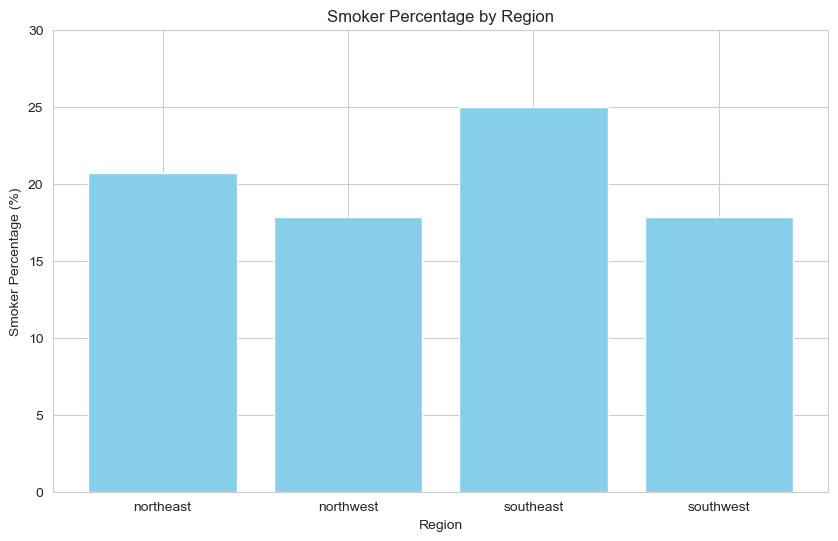

In [65]:
# Plot
plt.figure(figsize=(10, 6))
plt.bar(df_region_smokers['region'], df_region_smokers['smoker_percentage'], color='skyblue')

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Smoker Percentage (%)')
plt.title('Smoker Percentage by Region')
plt.ylim(0, 30)  # Adjust y-axis limits if needed

# Show the plot
plt.show()